In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/List of Countries by Sugarcane Production.csv')

df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


**Data Cleaning**

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...
98,Lebanon,Asia,97,16,3,"28.386,4"
99,Djibouti,Africa,53,51,NaN,NaN
100,Singapore,Asia,50,9,2,25
101,Samoa,Oceania,12,6,1,"11.949,8"


In [4]:
df.isna().sum()

Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [5]:
df = df.dropna().reset_index().drop("index", axis=1)

df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,"43.596,5"
98,Lebanon,Asia,97,16,3,"28.386,4"
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,"11.949,8"


In [6]:
df.dtypes

Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [7]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")
df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [8]:
df["Production (Tons)"] = df["Production (Tons)"].astype(float)
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].astype(float)
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype(float)

df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


**Outliers**

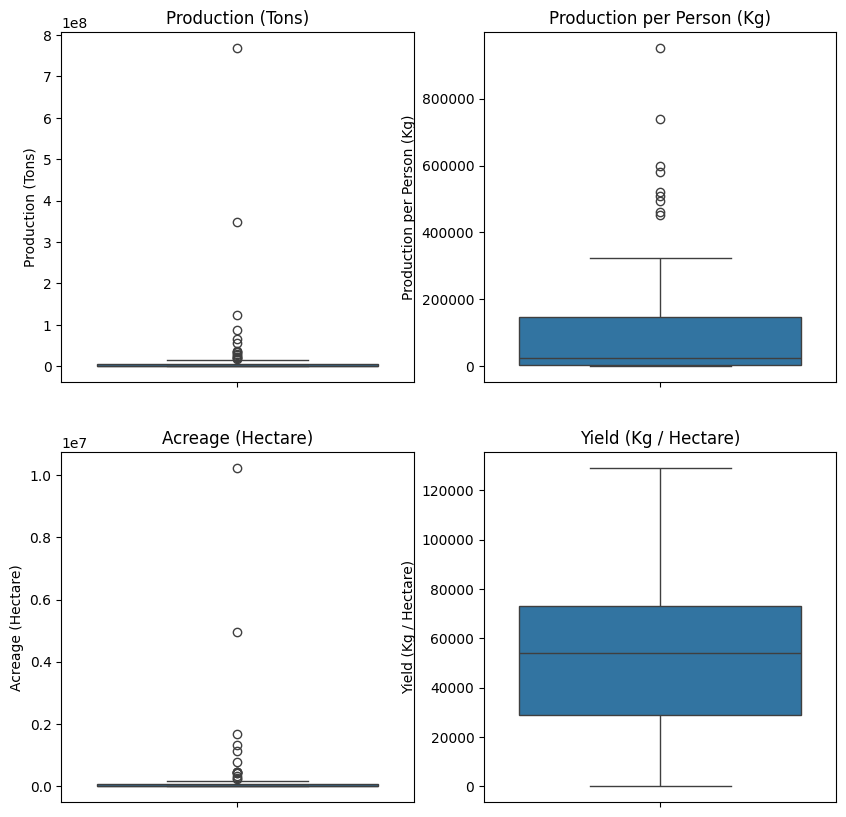

In [9]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(df["Production (Tons)"])
plt.title("Production (Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"])
plt.title("Production per Person (Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])
plt.title("Acreage (Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])
plt.title("Yield (Kg / Hectare)")

plt.show()

**Distribution of columns**

C:\Users\Subhadeep_Sarkar\AppData\Local\Temp\ipykernel_88220\3670770291.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production (Tons)"])
C:\Users\Subhadeep_Sarkar\AppData\Local\Temp\ipykernel_88220\3670770291.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production per Pers

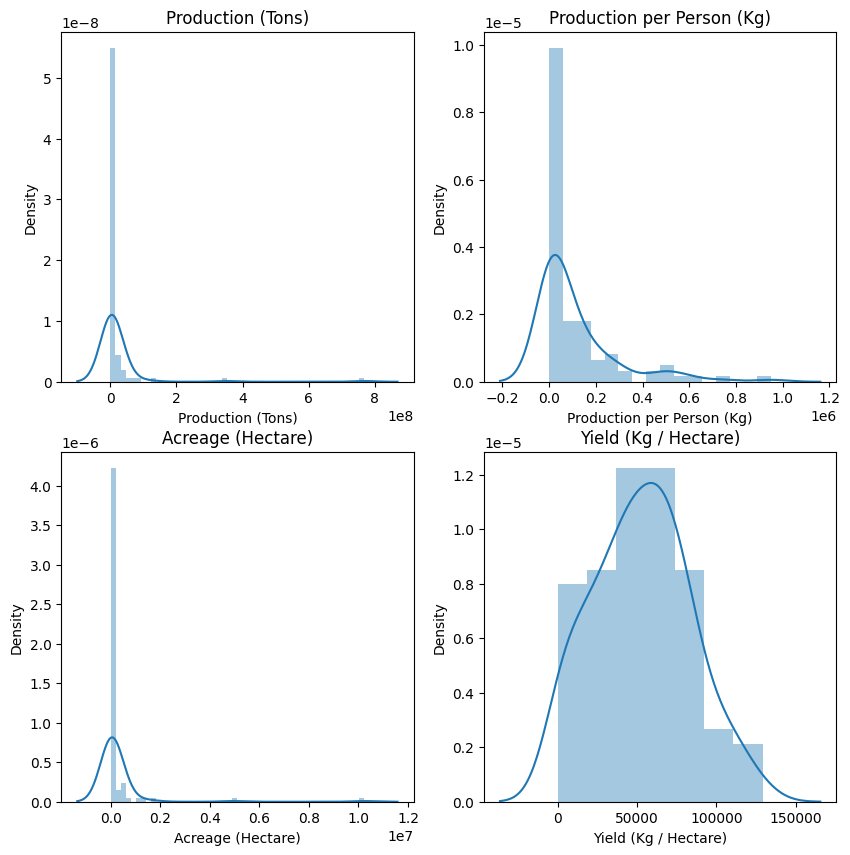

In [10]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.distplot(df["Production (Tons)"])
plt.title("Production (Tons)")
plt.subplot(2,2,2)
sns.distplot(df["Production per Person (Kg)"])
plt.title("Production per Person (Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage (Hectare)"])
plt.title("Acreage (Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])
plt.title("Yield (Kg / Hectare)")

plt.show()

**Using pie chart and barchart represent which country produces maximum sugar cane**

In [11]:
df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


In [18]:
df1 = df[["Country","Production (Tons)"]].set_index("Country")

df1

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


<Axes: ylabel='Production (Tons)'>

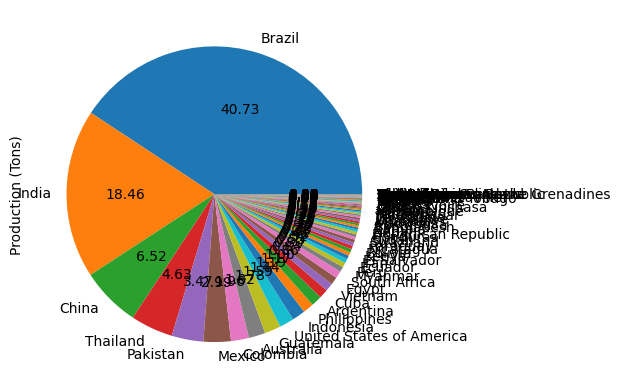

In [19]:
df1["Production (Tons)"].plot(kind="pie", autopct="%.2f")

C:\Users\Subhadeep_Sarkar\AppData\Local\Temp\ipykernel_88220\2409444544.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(bar.get_xticklabels(), rotation= 90)


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

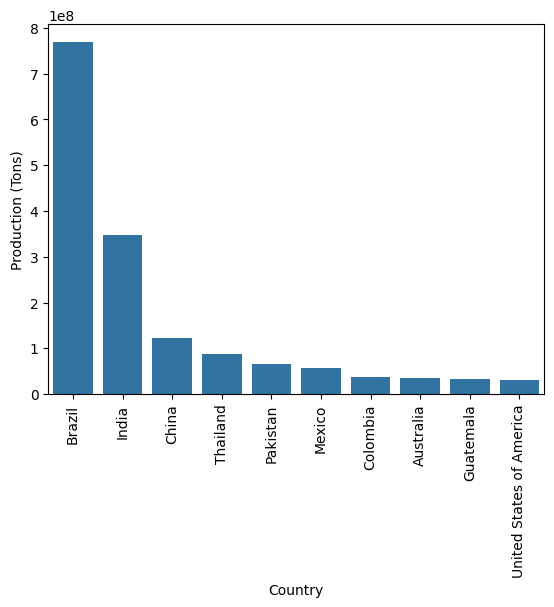

In [22]:
bar = sns.barplot(x="Country", y="Production (Tons)", data=df.head(10))
bar.set_xticklabels(bar.get_xticklabels(), rotation= 90)

**Which country has the highest land**

In [27]:
df2 = df[["Country","Acreage (Hectare)"]].sort_values(by="Acreage (Hectare)", ascending=False)

df2

,Country,Acreage (Hectare)
0,Brazil,10226205.0
1,India,4950000.0
2,China,1675215.0
3,Thailand,1336575.0
4,Pakistan,1130820.0
...,...,...
97,Spain,9.0
98,Lebanon,3.0
99,Singapore,2.0
100,Samoa,1.0


C:\Users\Subhadeep_Sarkar\AppData\Local\Temp\ipykernel_88220\1595753545.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(x="Country", y="Acreage (Hectare)", data=df.head(10)).set_xticklabels(bar.get_xticklabels(), rotation= 90)


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

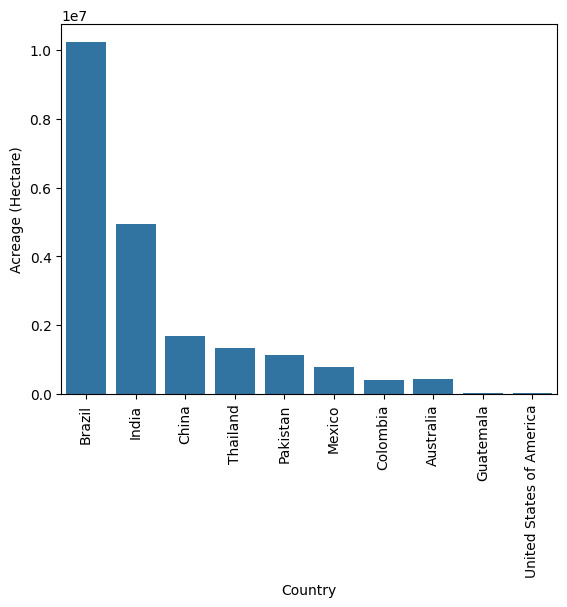

In [28]:
sns.barplot(x="Country", y="Acreage (Hectare)", data=df.head(10)).set_xticklabels(bar.get_xticklabels(), rotation= 90)

**Does area of farming is positively related to total production**

In [54]:
df3 = df[["Country","Continent","Production (Tons)","Acreage (Hectare)"]].set_index("Country")

df3

,Continent,Production (Tons),Acreage (Hectare)
Country,,,
Brazil,South America,768678382.0,10226205.0
India,Asia,348448000.0,4950000.0
China,Asia,123059739.0,1675215.0
Thailand,Asia,87468496.0,1336575.0
Pakistan,Asia,65450704.0,1130820.0
...,...,...,...
Spain,Europe,394.0,9.0
Lebanon,Asia,97.0,3.0
Singapore,Asia,50.0,2.0


In [62]:
df3.iloc[:,1:3].corr()

,Production (Tons),Acreage (Hectare)
Production (Tons),1.00000,0.99755
Acreage (Hectare),0.99755,1.00000


<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

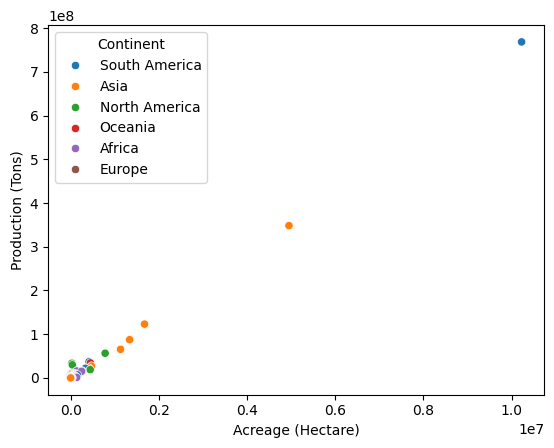

In [61]:
sns.scatterplot(x="Acreage (Hectare)", y="Production (Tons)", data = df3, hue="Continent")

yes, Acreage is highly correlated to Production

**Which country has highest production per person**

In [42]:
df4 = df[["Country","Production per Person (Kg)"]].sort_values(by="Production per Person (Kg)", ascending=False).head(10)

df4

,Country,Production per Person (Kg)
25,Paraguay,951087.0
6,Colombia,740075.0
55,Trinidad and Tobago,597066.0
42,Panama,581814.0
51,Jamaica,521254.0
19,Ecuador,507518.0
12,Argentina,494237.0
29,Dominican Republic,459519.0
5,Mexico,452524.0
4,Pakistan,324219.0


C:\Users\Subhadeep_Sarkar\AppData\Local\Temp\ipykernel_88220\2743064511.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar2.set_xticklabels(bar2.get_xticklabels(), rotation = 90)


[Text(0, 0, 'Paraguay'),
 Text(1, 0, 'Colombia'),
 Text(2, 0, 'Trinidad and Tobago'),
 Text(3, 0, 'Panama'),
 Text(4, 0, 'Jamaica'),
 Text(5, 0, 'Ecuador'),
 Text(6, 0, 'Argentina'),
 Text(7, 0, 'Dominican Republic'),
 Text(8, 0, 'Mexico'),
 Text(9, 0, 'Pakistan')]

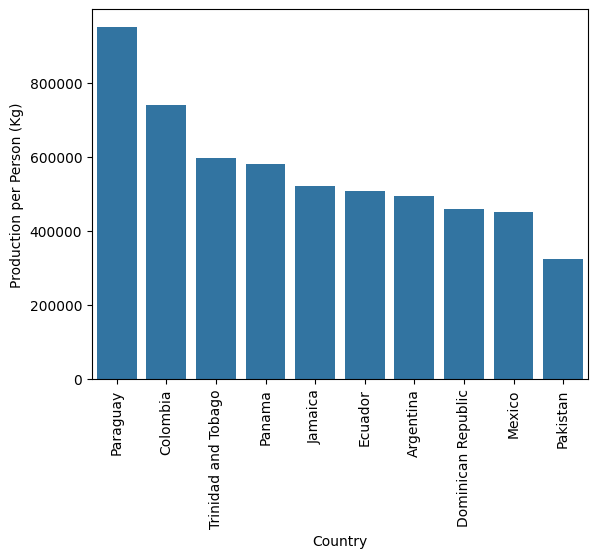

In [47]:
bar2 = sns.barplot(data=df4, x="Country", y="Production per Person (Kg)")
bar2.set_xticklabels(bar2.get_xticklabels(), rotation = 90)

**Does Production per persion effects total production of the country**

In [48]:
df5 = df[["Country","Production (Tons)","Production per Person (Kg)"]].set_index("Country")

df5

,Production (Tons),Production per Person (Kg)
Country,,
Brazil,768678382.0,3668.531
India,348448000.0,260721.000
China,123059739.0,88287.000
Thailand,87468496.0,1264.303
Pakistan,65450704.0,324219.000
...,...,...
Spain,394.0,8.000
Lebanon,97.0,16.000
Singapore,50.0,9.000


In [49]:
df5.corr()

,Production (Tons),Production per Person (Kg)
Production (Tons),1.000,0.015
Production per Person (Kg),0.015,1.000


<Axes: xlabel='Production per Person (Kg)', ylabel='Production (Tons)'>

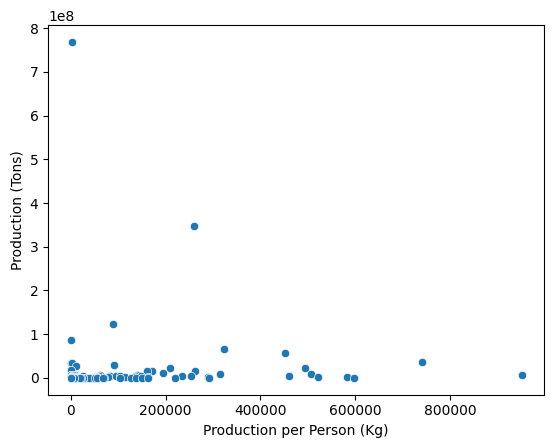

In [52]:
sns.scatterplot(y="Production (Tons)", x="Production per Person (Kg)", data=df5)

So, there is no such relationship b/w them

**Analysis of Continents**

In [63]:
df_cont = df.groupby("Continent").sum()

df_cont

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


In [65]:
df_cont["No of Countries"] = df.groupby("Continent").count()["Country"]

df_cont

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),No of Countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


**Which continent produces most sugar**

In [70]:
df_final = df_cont.sort_values(by="Production (Tons)", ascending=False)

df_final

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),No of Countries
Continent,,,,,,
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2


<Axes: xlabel='Continent', ylabel='Production (Tons)'>

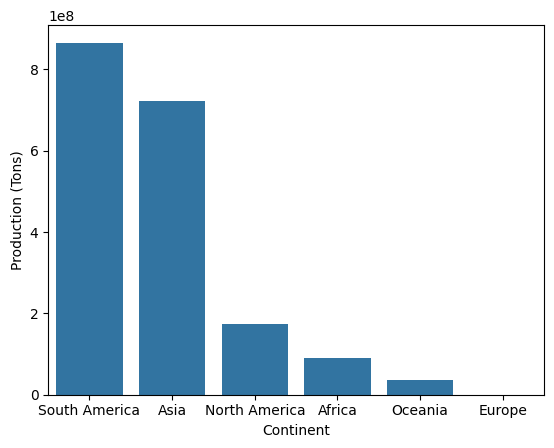

In [71]:
sns.barplot(x="Continent", y="Production (Tons)", data=df_final)